## Homework
The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.

### Q1. Downloading the data. 

We'll use the same NYC taxi dataset, but instead of "Green Taxi Trip Records", we'll use "Yellow Taxi Trip Records". 

**Download the data for January and February 2023.**

Read the data for January. How many columns are there?

Ans: **19**

In [1]:
import pandas as pd

pd.set_option('display.float_format', '{:.6f}'.format)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [4]:
jan_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
feb_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [5]:
jan_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.000000,0.970000,1.000000,N,161,141,2,9.300000,1.000000,0.500000,0.000000,0.000000,1.000000,14.300000,2.500000,0.000000
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.000000,1.100000,1.000000,N,43,237,1,7.900000,1.000000,0.500000,4.000000,0.000000,1.000000,16.900000,2.500000,0.000000
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.000000,2.510000,1.000000,N,48,238,1,14.900000,1.000000,0.500000,15.000000,0.000000,1.000000,34.900000,2.500000,0.000000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.000000,1.900000,1.000000,N,138,7,1,12.100000,7.250000,0.500000,0.000000,0.000000,1.000000,20.850000,0.000000,1.250000
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.000000,1.430000,1.000000,N,107,79,1,11.400000,1.000000,0.500000,3.280000,0.000000,1.000000,19.680000,2.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.050000,NaN,None,107,48,0,15.800000,0.000000,0.500000,3.960000,0.000000,1.000000,23.760000,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.800000,NaN,None,112,75,0,22.430000,0.000000,0.500000,2.640000,0.000000,1.000000,29.070000,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.670000,NaN,None,114,239,0,17.610000,0.000000,0.500000,5.320000,0.000000,1.000000,26.930000,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.150000,NaN,None,230,79,0,18.150000,0.000000,0.500000,4.430000,0.000000,1.000000,26.580000,NaN,NaN


In [6]:
feb_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.000000,0.300000,1.000000,N,142,163,2,4.400000,3.500000,0.500000,0.000000,0.000000,1.000000,9.400000,2.500000,0.000000
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.000000,0.000000,1.000000,N,71,71,4,-3.000000,-1.000000,-0.500000,0.000000,0.000000,-1.000000,-5.500000,0.000000,0.000000
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.000000,0.000000,1.000000,N,71,71,4,3.000000,1.000000,0.500000,0.000000,0.000000,1.000000,5.500000,0.000000,0.000000
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.000000,18.800000,1.000000,N,132,26,1,70.900000,2.250000,0.500000,0.000000,0.000000,1.000000,74.650000,0.000000,1.250000
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.000000,3.220000,1.000000,N,161,145,1,17.000000,1.000000,0.500000,3.300000,0.000000,1.000000,25.300000,2.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913950,2,2023-02-28 23:46:00,2023-03-01 00:05:00,NaN,4.650000,NaN,None,249,140,0,20.220000,0.000000,0.500000,4.840000,0.000000,1.000000,29.060000,NaN,NaN
2913951,2,2023-02-28 23:26:02,2023-02-28 23:37:10,NaN,2.470000,NaN,None,186,79,0,13.660000,0.000000,0.500000,2.650000,0.000000,1.000000,20.310000,NaN,NaN
2913952,2,2023-02-28 23:24:00,2023-02-28 23:38:00,NaN,3.490000,NaN,None,158,143,0,17.640000,0.000000,0.500000,0.000000,0.000000,1.000000,21.640000,NaN,NaN
2913953,2,2023-02-28 23:03:00,2023-02-28 23:10:00,NaN,2.130000,NaN,None,79,162,0,13.560000,0.000000,0.500000,2.630000,0.000000,1.000000,20.190000,NaN,NaN


In [7]:
print('shape of jan', jan_df.shape)
print('shape of feb', feb_df.shape)

shape of jan (3066766, 19)
shape of feb (2913955, 19)


### Q2. Computing duration
Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the standard deviation of the trips duration in January?

Ans: **42.59**

In [8]:
jan_df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [9]:
feb_df.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
dtype: object

In [10]:
jan_df['duration'] = jan_df.tpep_dropoff_datetime - jan_df.tpep_pickup_datetime
feb_df['duration'] = feb_df.tpep_dropoff_datetime - feb_df.tpep_pickup_datetime

In [11]:
jan_df.duration = jan_df.duration.apply(lambda td: td.total_seconds() / 60)

In [12]:
feb_df.duration = feb_df.duration.apply(lambda td: td.total_seconds() / 60)

In [13]:
jan_df.duration.describe()

count   3066766.000000
mean         15.668995
std          42.594351
min         -29.200000
25%           7.116667
50%          11.516667
75%          18.300000
max       10029.183333
Name: duration, dtype: float64

### Q3. Dropping outliers
Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

Ans: **98%**

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

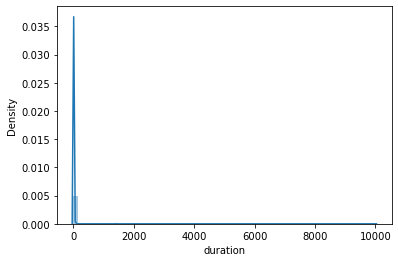

In [14]:
sns.distplot(jan_df.duration)

In [15]:
jan_df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count   3066766.000000
mean         15.668995
std          42.594351
min         -29.200000
50%          11.516667
95%          36.466667
98%          48.733333
99%          57.250000
max       10029.183333
Name: duration, dtype: float64

In [16]:
jan_df = jan_df[(jan_df.duration >= 1) & (jan_df.duration <= 60)]

In [17]:
feb_df = feb_df[(feb_df.duration >= 1) & (feb_df.duration <= 60)]

In [18]:
print('shape of jan', jan_df.shape)
print('shape of feb', feb_df.shape)

print('fraction left for jan', (3009173 / 3066766) * 100)
print('fraction left for jan', (2855951 / 2913955) * 100)

shape of jan (3009173, 20)
shape of feb (2855951, 20)
fraction left for jan 98.1220282212598
fraction left for jan 98.00944077722545


### Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

- Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
- Fit a dictionary vectorizer
- Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

Ans: **515**

In [19]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']
jan_df[categorical] = jan_df[categorical].astype(str)

/tmp/ipykernel_2735/3276270109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jan_df[categorical] = jan_df[categorical].astype(str)


In [20]:
feb_df[categorical] = feb_df[categorical].astype(str)

/tmp/ipykernel_2735/3178317842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feb_df[categorical] = feb_df[categorical].astype(str)


In [21]:
feb_df.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
duration                        float64
dtype: object

In [22]:
jan_df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [23]:
train_dicts = jan_df[categorical].to_dict(orient='records')

In [24]:
test_dicts = feb_df[categorical].to_dict(orient='records')

In [25]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [26]:
print('shape of X_train', X_train.shape)

shape of X_train (3009173, 515)


In [27]:
X_test = dv.transform(test_dicts)
print('shape of X_test', X_test.shape)


shape of X_test (2855951, 515)


### Q5. Training a model

Now let's use the feature matrix from the previous step to train a model.

- Train a plain linear regression model with default parameters, where duration is the response variable
- Calculate the RMSE of the model on the training data

What's the RMSE on train?

Ans: **7.64**

In [28]:
target = 'duration'
y_train = jan_df[target].values

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(X_train)

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


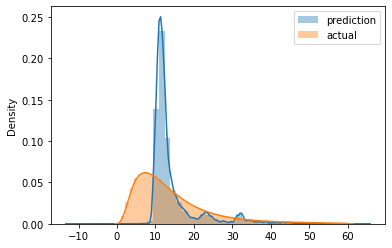

In [31]:
sns.distplot(y_pred, label = 'prediction')
sns.distplot(y_train, label = 'actual')

plt.legend()

In [32]:
mean_squared_error(y_train, y_pred, squared=False)

7.649261027855596

In [36]:
y_train = feb_df[target].values
y_pred = lr.predict(X_test)

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


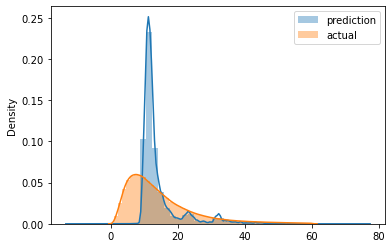

In [37]:
sns.distplot(y_pred, label = 'prediction')
sns.distplot(y_train, label = 'actual')

plt.legend()

### Q6.  Evaluating the model

Now let's apply this model to the validation dataset (February 2023).

What's the RMSE on validation?

Ans: **7.81**

In [40]:
mean_squared_error(y_train, y_pred, squared=False)

7.8118325109416915